### Shark Attack

#### The following dataset tell about the attack of shark on North and South Carolina area. There are many features which are 
#### provided in dataset like turtle count in NC and SC .Along with it the weather condition like precipitation, humidity , station #### Pressure are also provided. The target variable are shark attack Yes or NO . I have used SVM and Decision tree classifer for #### checking the prediction. For EDA turtle count in NC and SC is consider. Similarly modelling is perform on Turtle count in NC #### and SC area    

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


##### reading CSV from local file 

In [16]:
df= pd.read_csv("F:\Summer 2\SAproject\WEKAFinalInputFile.csv",low_memory=False)
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 73 columns):
Unnamed: 0                         186 non-null int64
X.2                                186 non-null int64
X.1                                186 non-null int64
X                                  186 non-null int64
Id                                 186 non-null int64
Date                               186 non-null object
ID                                 186 non-null int64
TurtleExactCountSC                 151 non-null float64
turtleexactdiscretizeSC            151 non-null object
TurtleExactCountNC                 149 non-null float64
TurtleExactCombined                186 non-null int64
TurtleexactdiscretizeNC            149 non-null object
TurtleAttackActivity               72 non-null float64
TurtleAttackActivityDiscretized    72 non-null object
Area                               72 non-null object
Location                           72 non-null object
Time                   

##### displaying the general attributes of data 

In [17]:
print(df.info())
print(df.columns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 73 columns):
Unnamed: 0                         186 non-null int64
X.2                                186 non-null int64
X.1                                186 non-null int64
X                                  186 non-null int64
Id                                 186 non-null int64
Date                               186 non-null object
ID                                 186 non-null int64
TurtleExactCountSC                 151 non-null float64
turtleexactdiscretizeSC            151 non-null object
TurtleExactCountNC                 149 non-null float64
TurtleExactCombined                186 non-null int64
TurtleexactdiscretizeNC            149 non-null object
TurtleAttackActivity               72 non-null float64
TurtleAttackActivityDiscretized    72 non-null object
Area                               72 non-null object
Location                           72 non-null object
Time                   

In [19]:
##converting the date to date time object 
df['Date'] = pd.to_datetime(df['Date'])
print(df.head())

   Unnamed: 0  X.2  X.1  X  Id       Date  ID  TurtleExactCountSC  \
0           1    1    1  1   4 2009-05-04  25                 0.0   
1           2    2    2  2   5 2009-05-05  33                 0.0   
2           3    3    3  3   7 2009-05-07  49                 1.0   
3           4    4    4  4   8 2009-05-08  57                 0.0   
4           5    5    5  5  11 2009-05-11  81                 2.0   

  turtleexactdiscretizeSC  TurtleExactCountNC       ...        \
0                     Low                 0.0       ...         
1                     Low                 0.0       ...         
2                     Low                 0.0       ...         
3                     Low                 0.0       ...         
4                     Low                 0.0       ...         

   StationPressure_minmax WindSpeed_minmax  Salinity_minmax Turbidity_minmax  \
0                0.578947         0.333333         0.636021         0.032566   
1                0.649123         

In [20]:
print(df.describe)

<bound method NDFrame.describe of      Unnamed: 0  X.2  X.1    X    Id       Date   ID  TurtleExactCountSC  \
0             1    1    1    1     4 2009-05-04   25                 0.0   
1             2    2    2    2     5 2009-05-05   33                 0.0   
2             3    3    3    3     7 2009-05-07   49                 1.0   
3             4    4    4    4     8 2009-05-08   57                 0.0   
4             5    5    5    5    11 2009-05-11   81                 2.0   
5             6    6    6    6    14 2009-05-14  105                15.0   
6             7    7    7    7    16 2009-05-16  121                 9.0   
7             8    8    8    8    18 2009-05-18  137                 7.0   
8             9    9    9    9    27 2009-05-27  209                23.0   
9            10   10   10   10    29 2009-05-29  225                48.0   
10           11   11   11   11    34 2009-06-03  265                48.0   
11           12   12   12   12    35 2009-06-04  273  

In [23]:
## adding column year to show the number of attack per year

df_attack = df.loc[:,:]
# df_attack.iscopy= True
df_attack['Year'] = df_attack['Date'].map(lambda x: x.year)
print(df_attack['Year'])

0      2009
1      2009
2      2009
3      2009
4      2009
5      2009
6      2009
7      2009
8      2009
9      2009
10     2009
11     2009
12     2009
13     2009
14     2009
15     2009
16     2009
17     2009
18     2009
19     2009
20     2009
21     2009
22     2009
23     2009
24     2009
25     2009
26     2009
27     2009
28     2009
29     2009
       ... 
156    2015
157    2015
158    2015
159    2015
160    2015
161    2015
162    2015
163    2015
164    2015
165    2015
166    2015
167    2015
168    2016
169    2016
170    2016
171    2016
172    2016
173    2016
174    2016
175    2016
176    2016
177    2016
178    2016
179    2016
180    2016
181    2016
182    2016
183    2016
184    2016
185    2016
Name: Year, Length: 186, dtype: int64


In [24]:
print(df_attack.head())

   Unnamed: 0  X.2  X.1  X  Id       Date  ID  TurtleExactCountSC  \
0           1    1    1  1   4 2009-05-04  25                 0.0   
1           2    2    2  2   5 2009-05-05  33                 0.0   
2           3    3    3  3   7 2009-05-07  49                 1.0   
3           4    4    4  4   8 2009-05-08  57                 0.0   
4           5    5    5  5  11 2009-05-11  81                 2.0   

  turtleexactdiscretizeSC  TurtleExactCountNC  ...   WindSpeed_minmax  \
0                     Low                 0.0  ...           0.333333   
1                     Low                 0.0  ...           0.202614   
2                     Low                 0.0  ...           0.405229   
3                     Low                 0.0  ...           0.267974   
4                     Low                 0.0  ...           0.385621   

  Salinity_minmax  Turbidity_minmax Dissolved02_minmax WaterTemp_minmax  \
0        0.636021          0.032566           0.741354         0.576733

##### Showing the no of attack happen in particular year

In [25]:
atk_year = df_attack.groupby(['Year','Attack'])
print(atk_year.size().unstack())

Attack    No   Yes
Year              
2009    47.0   2.0
2010    50.0   6.0
2011    17.0   8.0
2012     NaN   9.0
2013     NaN   6.0
2014     NaN   8.0
2015     NaN  15.0
2016     NaN  18.0


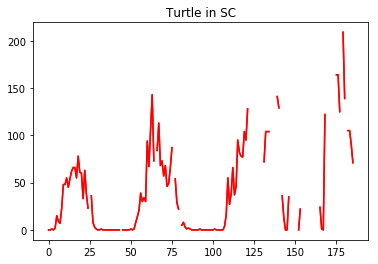

In [27]:
# graph of turtle count  in SC
plt.plot(df['TurtleExactCountSC'],color='red',label='Turtle in SC')
plt.title('Turtle in SC')
# plt.xlabels('')
plt.show()


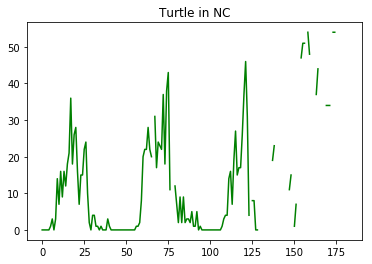

In [29]:
#graoh of turtle count in NC
plt.plot(df['TurtleExactCountNC'],color='green',label='Turtle in NC')
plt.title('Turtle in NC')
# plt.xlabels('')
plt.show()


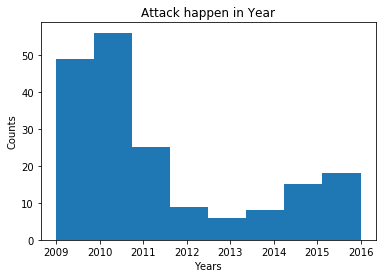

In [47]:
ser_year = df['Year'].dropna(axis=0,how='any',inplace=False)

plt.plot()
_ = plt.hist(ser_year,bins=8,histtype='bar')
_ = plt.xlabel('Years')
_ = plt.ylabel('Counts')
_ = plt.title('Attack happen in Year')
plt.show()

#### Spliting the data in test and train dataset 

In [33]:
from sklearn.model_selection import train_test_split

train_set,test_set = train_test_split(df,test_size=0.2,random_state=42)

print(train_set.shape)
print(test_set.shape)

(148, 74)
(38, 74)


In [35]:
##filling the missing value in columns 

col = ['TurtleExactCountSC', 'TurtleExactCountNC']
df_atk = df.loc[:,:]
df_atk['TurtleExactCountSC'].fillna(method='bfill',inplace=True)
df_atk['TurtleExactCountNC'].fillna(0,inplace=True)

# chosing the X and Y coordinates 


#### Preparing for SVM model 

In [40]:
#### importing the pipeline 
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC

X = df_atk.loc[:,col]

Booldict = {'Yes':1,'No':0}
df['Target'] = df['Attack'].map(dict(Yes= 1,No=0))

y = df['Target']

#### Training the model for Attack Yes or No on Turtle counr in SC and NC

In [41]:
svm_clf = Pipeline((("scaler", StandardScaler()),("linear_svc", LinearSVC(C=1, loss="hinge")),))
svm_clf.fit(X, y)

Pipeline(steps=(('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))))

#### checking the prediction now 

In [42]:
# Passing the turtle count in SC as 105 and in NC 0
# 1 is for atack will happen
print(svm_clf.predict([[105, 0]]))


[1]


In [43]:
####  passing the count in SC 25 and NC 10
# 0 is for attack will not happen 
print(svm_clf.predict([[25, 10]]))


[0]


#### running the decision with same data set X and Y variables

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

tree_clf = DecisionTreeClassifier(max_depth=2)
print(tree_clf.fit(X, y))

###saving the output into folder 
export_graphviz(tree_clf,feature_names=['Turtle in SC','Turtle in NC'],
                out_file="F:/Summer 2/SAproject/turtle_tree.dot",class_names='Attack',rounded=True,filled=True)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')


#### checking the prediction now 

In [46]:
### 1 is for attack and 0 is for not attack 

print(tree_clf.predict([[105, 0]]))
print(tree_clf.predict([[25,10]]))

[1]
[0]
